In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv("comp.train.csv")

In [3]:
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df1.drop('FoodCourt', axis=1, inplace=True)
df1.drop('Name', axis=1, inplace=True)
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,151.0,565.0,2.0,True


In [5]:
homeplanet=pd.get_dummies(df1['HomePlanet'])

In [6]:
homeplanet.head()

,Earth,Europa,Mars
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0


In [7]:
destination=pd.get_dummies(df1['Destination'])

In [8]:
destination.head()

,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [9]:
df1['Age'].median()

27.0

<Axes: xlabel='VIP', ylabel='Age'>

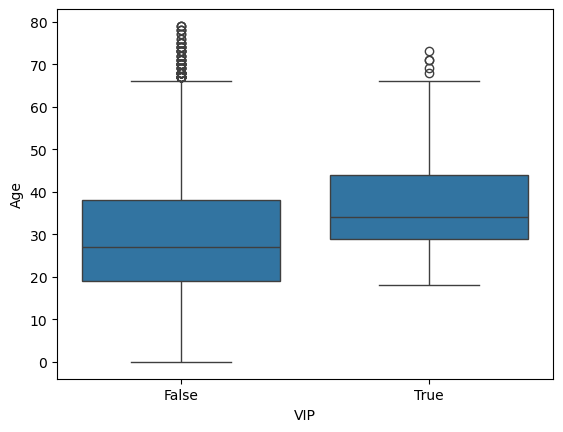

In [10]:
sns.boxplot(x='VIP',data=df1,y='Age')

<Axes: >

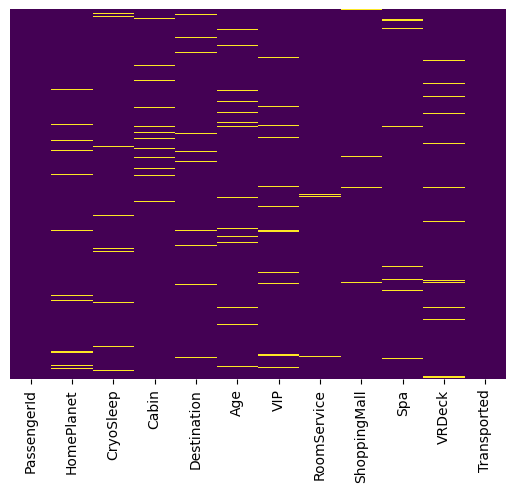

In [12]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
def impute_age(cols):
    Age = cols[0]
    VIP = cols[1]
    
    if pd.isnull(Age):
        if VIP == 'True':
            return 35
        else:
            return 28 
    else:
        return Age

In [14]:
df1['Age']=df1[['Age','VIP']].apply(impute_age,axis=1)

In [15]:
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,151.0,565.0,2.0,True


In [16]:
df1.drop('VRDeck', axis=1, inplace=True)

In [17]:
df1.drop('RoomService', axis=1, inplace=True)

In [18]:
df1.drop('Cabin', axis=1, inplace=True)

In [19]:
df1.drop('CryoSleep', axis=1, inplace=True)

In [20]:
df1.head()

,PassengerId,HomePlanet,Destination,Age,VIP,ShoppingMall,Spa,Transported
0,0001_01,Europa,TRAPPIST-1e,39.0,False,0.0,0.0,False
1,0002_01,Earth,TRAPPIST-1e,24.0,False,25.0,549.0,True
2,0003_01,Europa,TRAPPIST-1e,58.0,True,0.0,6715.0,False
3,0003_02,Europa,TRAPPIST-1e,33.0,False,371.0,3329.0,False
4,0004_01,Earth,TRAPPIST-1e,16.0,False,151.0,565.0,True


In [21]:
vip=pd.get_dummies(df1['VIP'])

In [22]:
vip

,False,True
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
8688,0,1
8689,1,0
8690,1,0
8691,1,0


In [23]:
from sklearn.impute import KNNImputer

In [24]:
knn=KNNImputer(n_neighbors=4)

In [25]:
knn.fit(vip)

KNNImputer(n_neighbors=4)

In [26]:
b= knn.transform(vip)

In [27]:
b

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [28]:
vip = pd.DataFrame(b)

In [29]:
new=pd.concat([df1,vip],axis=1)

In [30]:
new

,PassengerId,HomePlanet,Destination,Age,VIP,ShoppingMall,Spa,Transported,0,1
0,0001_01,Europa,TRAPPIST-1e,39.0,False,0.0,0.0,False,1.0,0.0
1,0002_01,Earth,TRAPPIST-1e,24.0,False,25.0,549.0,True,1.0,0.0
2,0003_01,Europa,TRAPPIST-1e,58.0,True,0.0,6715.0,False,0.0,1.0
3,0003_02,Europa,TRAPPIST-1e,33.0,False,371.0,3329.0,False,1.0,0.0
4,0004_01,Earth,TRAPPIST-1e,16.0,False,151.0,565.0,True,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,55 Cancri e,41.0,True,0.0,1643.0,False,0.0,1.0
8689,9278_01,Earth,PSO J318.5-22,18.0,False,0.0,0.0,False,1.0,0.0
8690,9279_01,Earth,TRAPPIST-1e,26.0,False,1872.0,1.0,True,1.0,0.0
8691,9280_01,Europa,55 Cancri e,32.0,False,0.0,353.0,False,1.0,0.0


<Axes: >

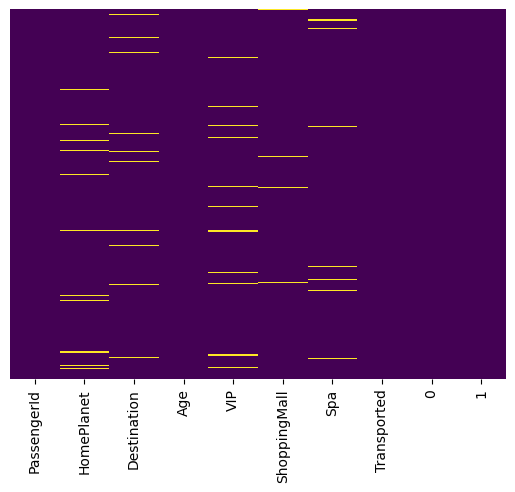

In [31]:
sns.heatmap(new.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
new.drop('VIP',axis=1,inplace=True)

In [33]:
new.head()

,PassengerId,HomePlanet,Destination,Age,ShoppingMall,Spa,Transported,0,1
0,0001_01,Europa,TRAPPIST-1e,39.0,0.0,0.0,False,1.0,0.0
1,0002_01,Earth,TRAPPIST-1e,24.0,25.0,549.0,True,1.0,0.0
2,0003_01,Europa,TRAPPIST-1e,58.0,0.0,6715.0,False,0.0,1.0
3,0003_02,Europa,TRAPPIST-1e,33.0,371.0,3329.0,False,1.0,0.0
4,0004_01,Earth,TRAPPIST-1e,16.0,151.0,565.0,True,1.0,0.0


In [34]:
from sklearn.impute import KNNImputer

In [35]:
knn = KNNImputer(n_neighbors=4)

In [36]:
knn.fit(destination)

KNNImputer(n_neighbors=4)

In [37]:
sewy = knn.transform(destination)

In [38]:
sewy

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [39]:
ss = pd.concat([destination,new],axis=1)

In [40]:
ss

,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,PassengerId,HomePlanet,Destination,Age,ShoppingMall,Spa,Transported,0,1
0,0,0,1,0001_01,Europa,TRAPPIST-1e,39.0,0.0,0.0,False,1.0,0.0
1,0,0,1,0002_01,Earth,TRAPPIST-1e,24.0,25.0,549.0,True,1.0,0.0
2,0,0,1,0003_01,Europa,TRAPPIST-1e,58.0,0.0,6715.0,False,0.0,1.0
3,0,0,1,0003_02,Europa,TRAPPIST-1e,33.0,371.0,3329.0,False,1.0,0.0
4,0,0,1,0004_01,Earth,TRAPPIST-1e,16.0,151.0,565.0,True,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,9276_01,Europa,55 Cancri e,41.0,0.0,1643.0,False,0.0,1.0
8689,0,1,0,9278_01,Earth,PSO J318.5-22,18.0,0.0,0.0,False,1.0,0.0
8690,0,0,1,9279_01,Earth,TRAPPIST-1e,26.0,1872.0,1.0,True,1.0,0.0
8691,1,0,0,9280_01,Europa,55 Cancri e,32.0,0.0,353.0,False,1.0,0.0


<Axes: >

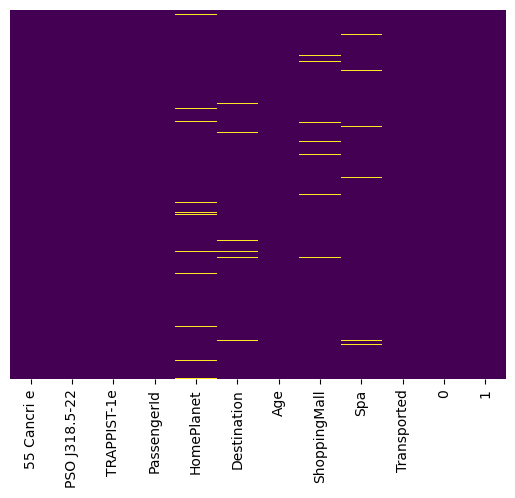

In [42]:
sns.heatmap(ss.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [43]:
homeplanet.head()

,Earth,Europa,Mars
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0


In [44]:
from sklearn.impute import KNNImputer

In [45]:
knn = KNNImputer(n_neighbors=4)

In [46]:
knn.fit(homeplanet)

KNNImputer(n_neighbors=4)

In [47]:
sewy2=knn.transform(homeplanet)

In [48]:
abc = pd.concat([homeplanet,ss],axis=1)

In [50]:
abc.head()

,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,PassengerId,HomePlanet,Destination,Age,ShoppingMall,Spa,Transported,0,1
0,0,1,0,0,0,1,0001_01,Europa,TRAPPIST-1e,39.0,0.0,0.0,False,1.0,0.0
1,1,0,0,0,0,1,0002_01,Earth,TRAPPIST-1e,24.0,25.0,549.0,True,1.0,0.0
2,0,1,0,0,0,1,0003_01,Europa,TRAPPIST-1e,58.0,0.0,6715.0,False,0.0,1.0
3,0,1,0,0,0,1,0003_02,Europa,TRAPPIST-1e,33.0,371.0,3329.0,False,1.0,0.0
4,1,0,0,0,0,1,0004_01,Earth,TRAPPIST-1e,16.0,151.0,565.0,True,1.0,0.0


<Axes: >

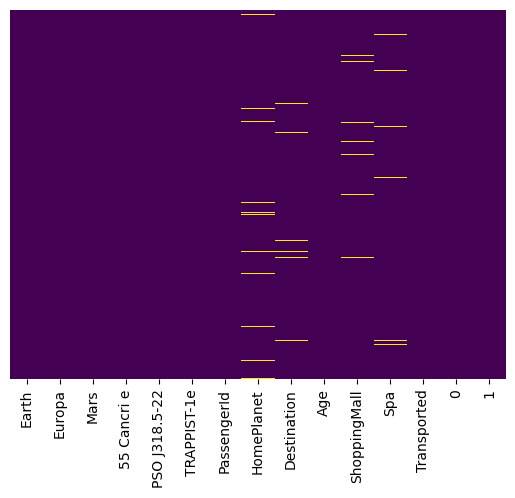

In [51]:
sns.heatmap(abc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [52]:
abc.head()

,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,PassengerId,HomePlanet,Destination,Age,ShoppingMall,Spa,Transported,0,1
0,0,1,0,0,0,1,0001_01,Europa,TRAPPIST-1e,39.0,0.0,0.0,False,1.0,0.0
1,1,0,0,0,0,1,0002_01,Earth,TRAPPIST-1e,24.0,25.0,549.0,True,1.0,0.0
2,0,1,0,0,0,1,0003_01,Europa,TRAPPIST-1e,58.0,0.0,6715.0,False,0.0,1.0
3,0,1,0,0,0,1,0003_02,Europa,TRAPPIST-1e,33.0,371.0,3329.0,False,1.0,0.0
4,1,0,0,0,0,1,0004_01,Earth,TRAPPIST-1e,16.0,151.0,565.0,True,1.0,0.0


In [53]:
abc.drop('Destination', axis=1,inplace=True)

In [54]:
abc.drop('Spa', axis=1,inplace=True)

In [55]:
abc.drop('HomePlanet', axis=1,inplace=True)

In [56]:
abc.head()

,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,PassengerId,Age,ShoppingMall,Transported,0,1
0,0,1,0,0,0,1,0001_01,39.0,0.0,False,1.0,0.0
1,1,0,0,0,0,1,0002_01,24.0,25.0,True,1.0,0.0
2,0,1,0,0,0,1,0003_01,58.0,0.0,False,0.0,1.0
3,0,1,0,0,0,1,0003_02,33.0,371.0,False,1.0,0.0
4,1,0,0,0,0,1,0004_01,16.0,151.0,True,1.0,0.0


<Axes: >

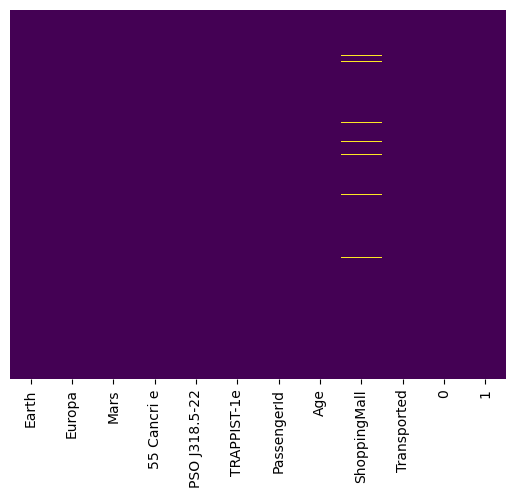

In [57]:
sns.heatmap(abc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [58]:
abc.rename(columns={0:'VIP'},inplace=True)

In [59]:
abc.rename(columns={1:'VIPs'},inplace=True)

In [60]:
abc.drop('VIPs',axis=1,inplace=True)

In [61]:
abc.drop("ShoppingMall",axis=1,inplace=True)

<Axes: >

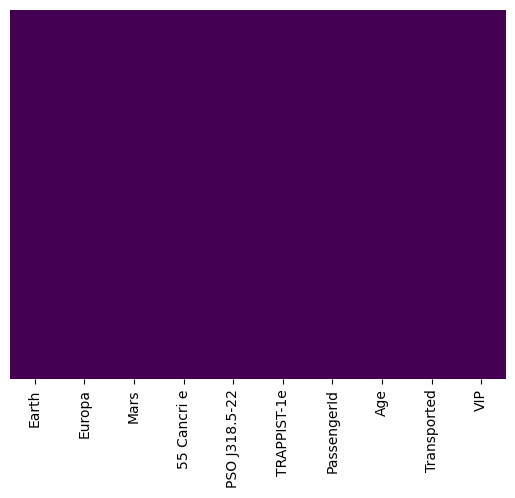

In [62]:
sns.heatmap(abc.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [63]:
new_namess = {'55 Cancri e': 'destinationfirst', 'PSO J318.5-22': 'destinationsecond','TRAPPIST-1e':'destinationthird','VIP':'False'}

In [64]:
abc = abc.rename(columns=new_namess)

In [65]:
abc.head()

,Earth,Europa,Mars,destinationfirst,destinationsecond,destinationthird,PassengerId,Age,Transported,False
0,0,1,0,0,0,1,0001_01,39.0,False,1.0
1,1,0,0,0,0,1,0002_01,24.0,True,1.0
2,0,1,0,0,0,1,0003_01,58.0,False,0.0
3,0,1,0,0,0,1,0003_02,33.0,False,1.0
4,1,0,0,0,0,1,0004_01,16.0,True,1.0


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = abc.drop('Transported',axis=1)

y= abc['Transported']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lgr = LogisticRegression()

In [70]:
lgr.fit(X_train,y_train)

LogisticRegression()

In [71]:
predicts = lgr.predict(X_test)

In [72]:
predicts

array([ True,  True,  True, ...,  True,  True,  True])

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(y_test,predicts))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1424
        True       0.50      1.00      0.67      1445

    accuracy                           0.50      2869
   macro avg       0.25      0.50      0.33      2869
weighted avg       0.25      0.50      0.34      2869



C:\Users\samri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\samri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
print(confusion_matrix(y_test,predicts))

[[   0 1424]
 [   0 1445]]


In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {"C":[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [78]:
from sklearn.svm import SVC

In [79]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.503 total time=   1.5s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.504 total time=   1.7s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.504 total time=   1.7s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.504 total time=   1.7s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.503 total time=   1.8s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.503 total time=   1.6s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.504 total time=   1.6s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.504 total time=   1.7s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.504 total time=   1.5s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.503 total time=   1.5s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.503 total time=   1.3s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

In [81]:
grid_predictions = grid.predict(X_test)

In [82]:
print(confusion_matrix(y_test,grid_predictions))

[[1208  216]
 [1088  357]]


In [83]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

       False       0.53      0.85      0.65      1424
        True       0.62      0.25      0.35      1445

    accuracy                           0.55      2869
   macro avg       0.57      0.55      0.50      2869
weighted avg       0.57      0.55      0.50      2869



In [84]:
test = pd.read_csv("comp.test.csv")

In [85]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [86]:
test.drop("CryoSleep",axis=1,inplace=True)

In [87]:
test.drop("Cabin",axis=1,inplace=True)

In [88]:
test.drop("RoomService",axis=1,inplace=True)

In [89]:
test.drop("FoodCourt",axis=1,inplace=True)

In [90]:
test.drop("ShoppingMall",axis=1,inplace=True)

In [91]:
test.drop("Spa",axis=1,inplace=True)

In [92]:
test.drop("VRDeck",axis=1,inplace=True)

In [93]:
test.drop("Name",axis=1,inplace=True)

In [94]:
test.head()

,PassengerId,HomePlanet,Destination,Age,VIP
0,0013_01,Earth,TRAPPIST-1e,27.0,False
1,0018_01,Earth,TRAPPIST-1e,19.0,False
2,0019_01,Europa,55 Cancri e,31.0,False
3,0021_01,Europa,TRAPPIST-1e,38.0,False
4,0023_01,Earth,TRAPPIST-1e,20.0,False


<Axes: >

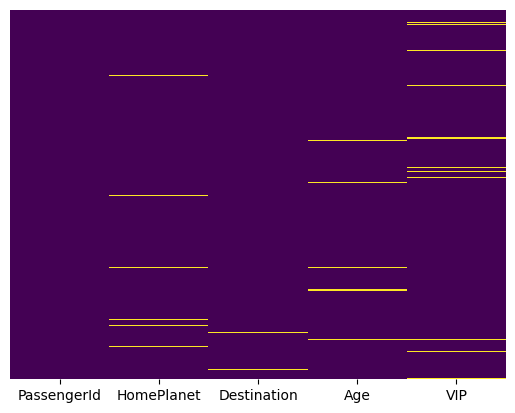

In [95]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='VIP', ylabel='Age'>

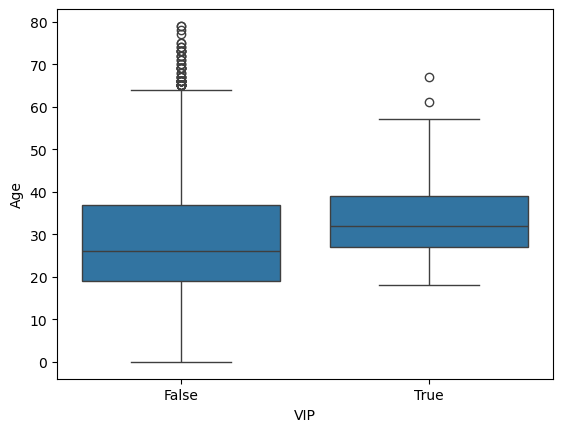

In [96]:
sns.boxplot(x='VIP',data=test,y='Age')

In [97]:
def impute_age(cols):
    Age = cols[0]
    VIP = cols[1]
    
    
    if pd.isnull(Age):
        if VIP == 'True':
            return 33
        else:
            return 26
    else:
        return Age

In [98]:
test['Age']=test[['Age','VIP']].apply(impute_age,axis=1)

In [158]:
test.head()

,PassengerId,HomePlanet,Destination,Age,VIP
0,0013_01,Earth,TRAPPIST-1e,27.0,False
1,0018_01,Earth,TRAPPIST-1e,19.0,False
2,0019_01,Europa,55 Cancri e,31.0,False
3,0021_01,Europa,TRAPPIST-1e,38.0,False
4,0023_01,Earth,TRAPPIST-1e,20.0,False


<Axes: >

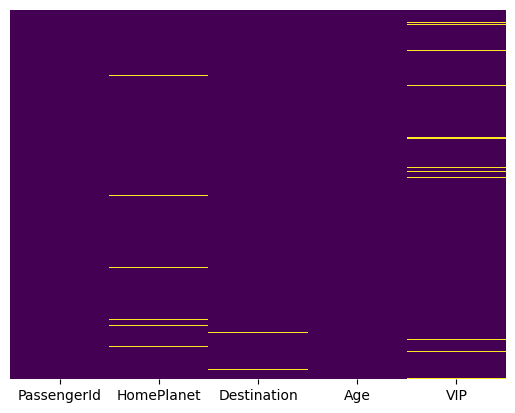

In [99]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [100]:
destination1=pd.get_dummies(test['Destination'])

In [101]:
destination1.head()

,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [102]:
from sklearn.impute import KNNImputer

In [103]:
knn=KNNImputer(n_neighbors=4)

In [104]:
knn.fit(destination1)

KNNImputer(n_neighbors=4)

In [105]:
knn.transform(destination1)

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.]])

In [106]:
do=pd.concat([destination1,test],axis=1)

In [107]:
do.drop("Destination",axis=1,inplace=True)

<Axes: >

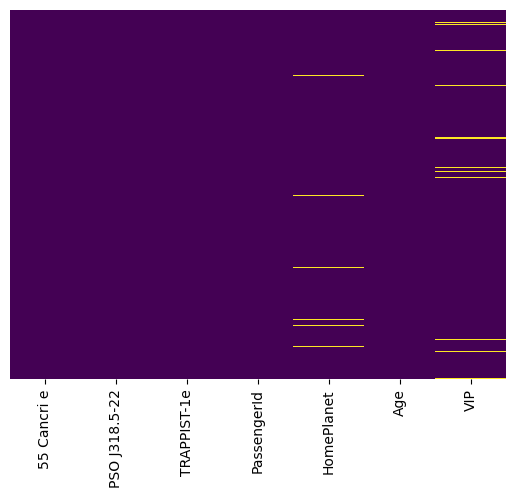

In [108]:
sns.heatmap(do.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [159]:
do.head()

,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,PassengerId,HomePlanet,Age,VIP
0,0,0,1,0013_01,Earth,27.0,False
1,0,0,1,0018_01,Earth,19.0,False
2,1,0,0,0019_01,Europa,31.0,False
3,0,0,1,0021_01,Europa,38.0,False
4,0,0,1,0023_01,Earth,20.0,False


In [109]:
homeplanet=pd.get_dummies(do['HomePlanet'])

In [110]:
homeplanet.head()

,Earth,Europa,Mars
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
4,1,0,0


In [261]:
from sklearn.impute import KNNImputer

In [262]:
knn = KNNImputer(n_neighbors=4)

In [263]:
knn.fit(homeplanet)

KNNImputer(n_neighbors=4)

In [264]:
knn.transform(homeplanet)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [265]:
zo=pd.concat([homeplanet,do],axis=1)

In [266]:
zo.head()

,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,PassengerId,HomePlanet,Age,VIP
0,1,0,0,0,0,1,0013_01,Earth,27.0,False
1,1,0,0,0,0,1,0018_01,Earth,19.0,False
2,0,1,0,1,0,0,0019_01,Europa,31.0,False
3,0,1,0,0,0,1,0021_01,Europa,38.0,False
4,1,0,0,0,0,1,0023_01,Earth,20.0,False


<Axes: >

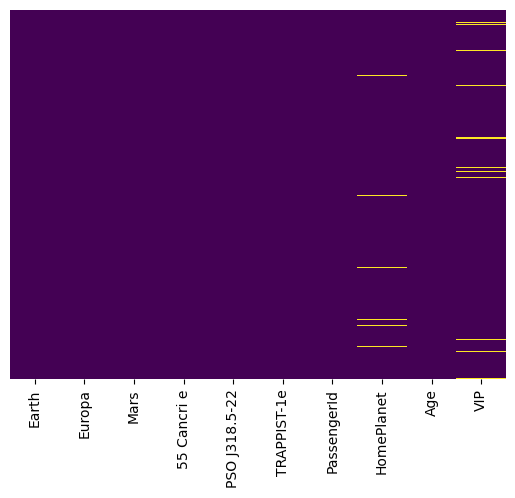

In [267]:
sns.heatmap(zo.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [268]:
zo.drop("HomePlanet",axis=1,inplace=True)

In [269]:
vip=pd.get_dummies(zo['VIP'])

In [296]:
vip

,False,True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
4272,1,0
4273,1,0
4274,1,0
4275,1,0


In [297]:
from sklearn.impute import KNNImputer

In [298]:
knn = KNNImputer(n_neighbors=4)

In [299]:
knn.fit(vip)

KNNImputer(n_neighbors=4)

In [285]:
sewy3=knn.transform(vip)

In [300]:
sewy3

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [301]:
vip = pd.DataFrame(sewy3)

In [315]:
newzz = pd.concat([vip,zo],axis=1)

In [316]:
newzz

,0,1,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,PassengerId,Age,VIP
0,1.0,0.0,1,0,0,0,0,1,0013_01,27.0,False
1,1.0,0.0,1,0,0,0,0,1,0018_01,19.0,False
2,1.0,0.0,0,1,0,1,0,0,0019_01,31.0,False
3,1.0,0.0,0,1,0,0,0,1,0021_01,38.0,False
4,1.0,0.0,1,0,0,0,0,1,0023_01,20.0,False
...,...,...,...,...,...,...,...,...,...,...,...
4272,1.0,0.0,1,0,0,0,0,1,9266_02,34.0,False
4273,1.0,0.0,1,0,0,0,0,1,9269_01,42.0,False
4274,1.0,0.0,0,0,1,1,0,0,9271_01,26.0,False
4275,1.0,0.0,0,1,0,0,0,0,9273_01,26.0,False


<Axes: >

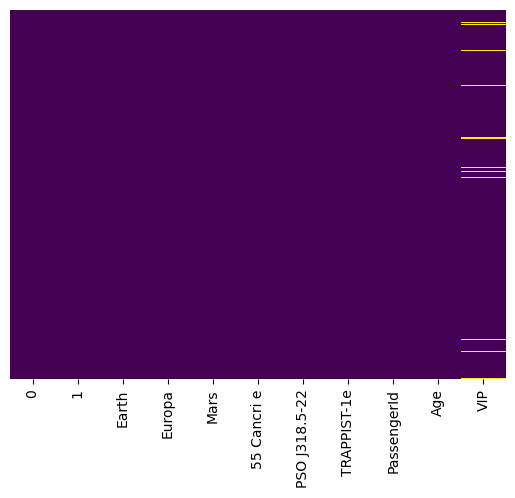

In [317]:
sns.heatmap(newzz.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [318]:
newzz.drop('VIP',axis=1,inplace=True)

In [319]:
newzz.head()

,0,1,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,PassengerId,Age
0,1.0,0.0,1,0,0,0,0,1,0013_01,27.0
1,1.0,0.0,1,0,0,0,0,1,0018_01,19.0
2,1.0,0.0,0,1,0,1,0,0,0019_01,31.0
3,1.0,0.0,0,1,0,0,0,1,0021_01,38.0
4,1.0,0.0,1,0,0,0,0,1,0023_01,20.0


In [320]:
newzz.rename(columns={0:'VIP'},inplace=True)

In [321]:
newzz.rename(columns={1:'VIPs'},inplace=True)

In [322]:
newzz.drop('VIPs',axis=1,inplace=True)

<Axes: >

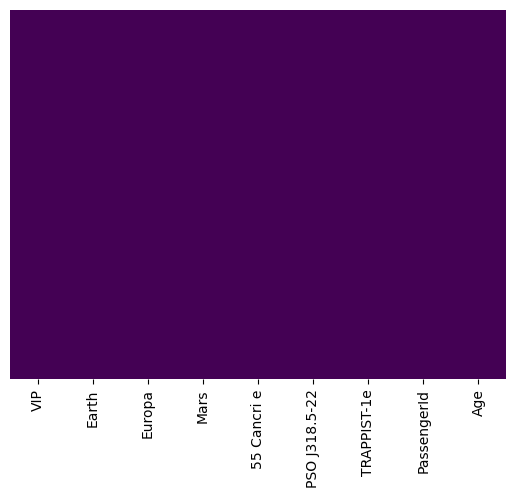

In [323]:
sns.heatmap(newzz.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [324]:
new_namessd = {'55 Cancri e': 'destinationfirst', 'PSO J318.5-22': 'destinationsecond','TRAPPIST-1e':'destinationthird','VIP':'False'}

In [325]:
newzz= newzz.rename(columns=new_namessd)

In [326]:
newzz

,False,Earth,Europa,Mars,destinationfirst,destinationsecond,destinationthird,PassengerId,Age
0,1.0,1,0,0,0,0,1,0013_01,27.0
1,1.0,1,0,0,0,0,1,0018_01,19.0
2,1.0,0,1,0,1,0,0,0019_01,31.0
3,1.0,0,1,0,0,0,1,0021_01,38.0
4,1.0,1,0,0,0,0,1,0023_01,20.0
...,...,...,...,...,...,...,...,...,...
4272,1.0,1,0,0,0,0,1,9266_02,34.0
4273,1.0,1,0,0,0,0,1,9269_01,42.0
4274,1.0,0,0,1,1,0,0,9271_01,26.0
4275,1.0,0,1,0,0,0,0,9273_01,26.0


In [327]:
newzz['False']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4272    1.0
4273    1.0
4274    1.0
4275    1.0
4276    1.0
Name: False, Length: 4277, dtype: float64

In [328]:
desired_ordered = ['Earth', 'Europa', 'Mars','destinationfirst','destinationsecond','destinationthird','PassengerId','Age','False']

In [329]:
new_order = newzz[desired_ordered]


In [330]:
new_order

,Earth,Europa,Mars,destinationfirst,destinationsecond,destinationthird,PassengerId,Age,False
0,1,0,0,0,0,1,0013_01,27.0,1.0
1,1,0,0,0,0,1,0018_01,19.0,1.0
2,0,1,0,1,0,0,0019_01,31.0,1.0
3,0,1,0,0,0,1,0021_01,38.0,1.0
4,1,0,0,0,0,1,0023_01,20.0,1.0
...,...,...,...,...,...,...,...,...,...
4272,1,0,0,0,0,1,9266_02,34.0,1.0
4273,1,0,0,0,0,1,9269_01,42.0,1.0
4274,0,0,1,1,0,0,9271_01,26.0,1.0
4275,0,1,0,0,0,0,9273_01,26.0,1.0


In [331]:
predictions = lgr.predict(new_order)

In [332]:
predictions

array([ True,  True,  True, ...,  True,  True,  True])

In [333]:
dfzr = pd.DataFrame(predictions)

In [334]:
newzz['PassengerId'].head()

0    0013_01
1    0018_01
2    0019_01
3    0021_01
4    0023_01
Name: PassengerId, dtype: object

In [335]:
new_df = pd.concat([newzz['PassengerId'], dfzr], axis=1)

In [336]:
new_df

,PassengerId,0
0,0013_01,True
1,0018_01,True
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
